In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix, classification_report,
    accuracy_score, f1_score, roc_auc_score, roc_curve, auc
)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [11]:
df_org = pd.read_csv(r"C:\Users\MaesakD\Downloads\fetal_health.csv")
df = df_org.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [17]:
print(df['fetal_health'].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


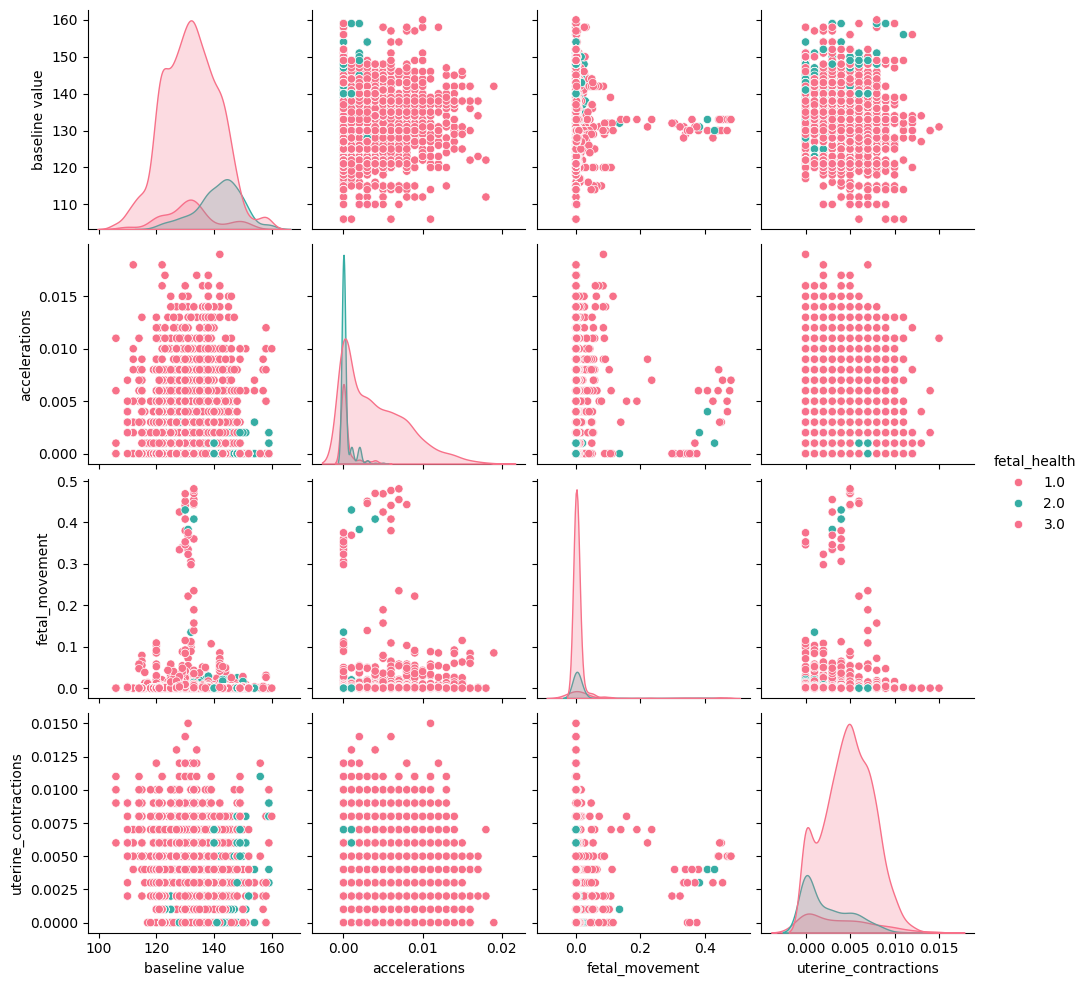

In [21]:
selected_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'fetal_health']
sns.pairplot(df[selected_features], hue='fetal_health', palette='husl')  
plt.show()

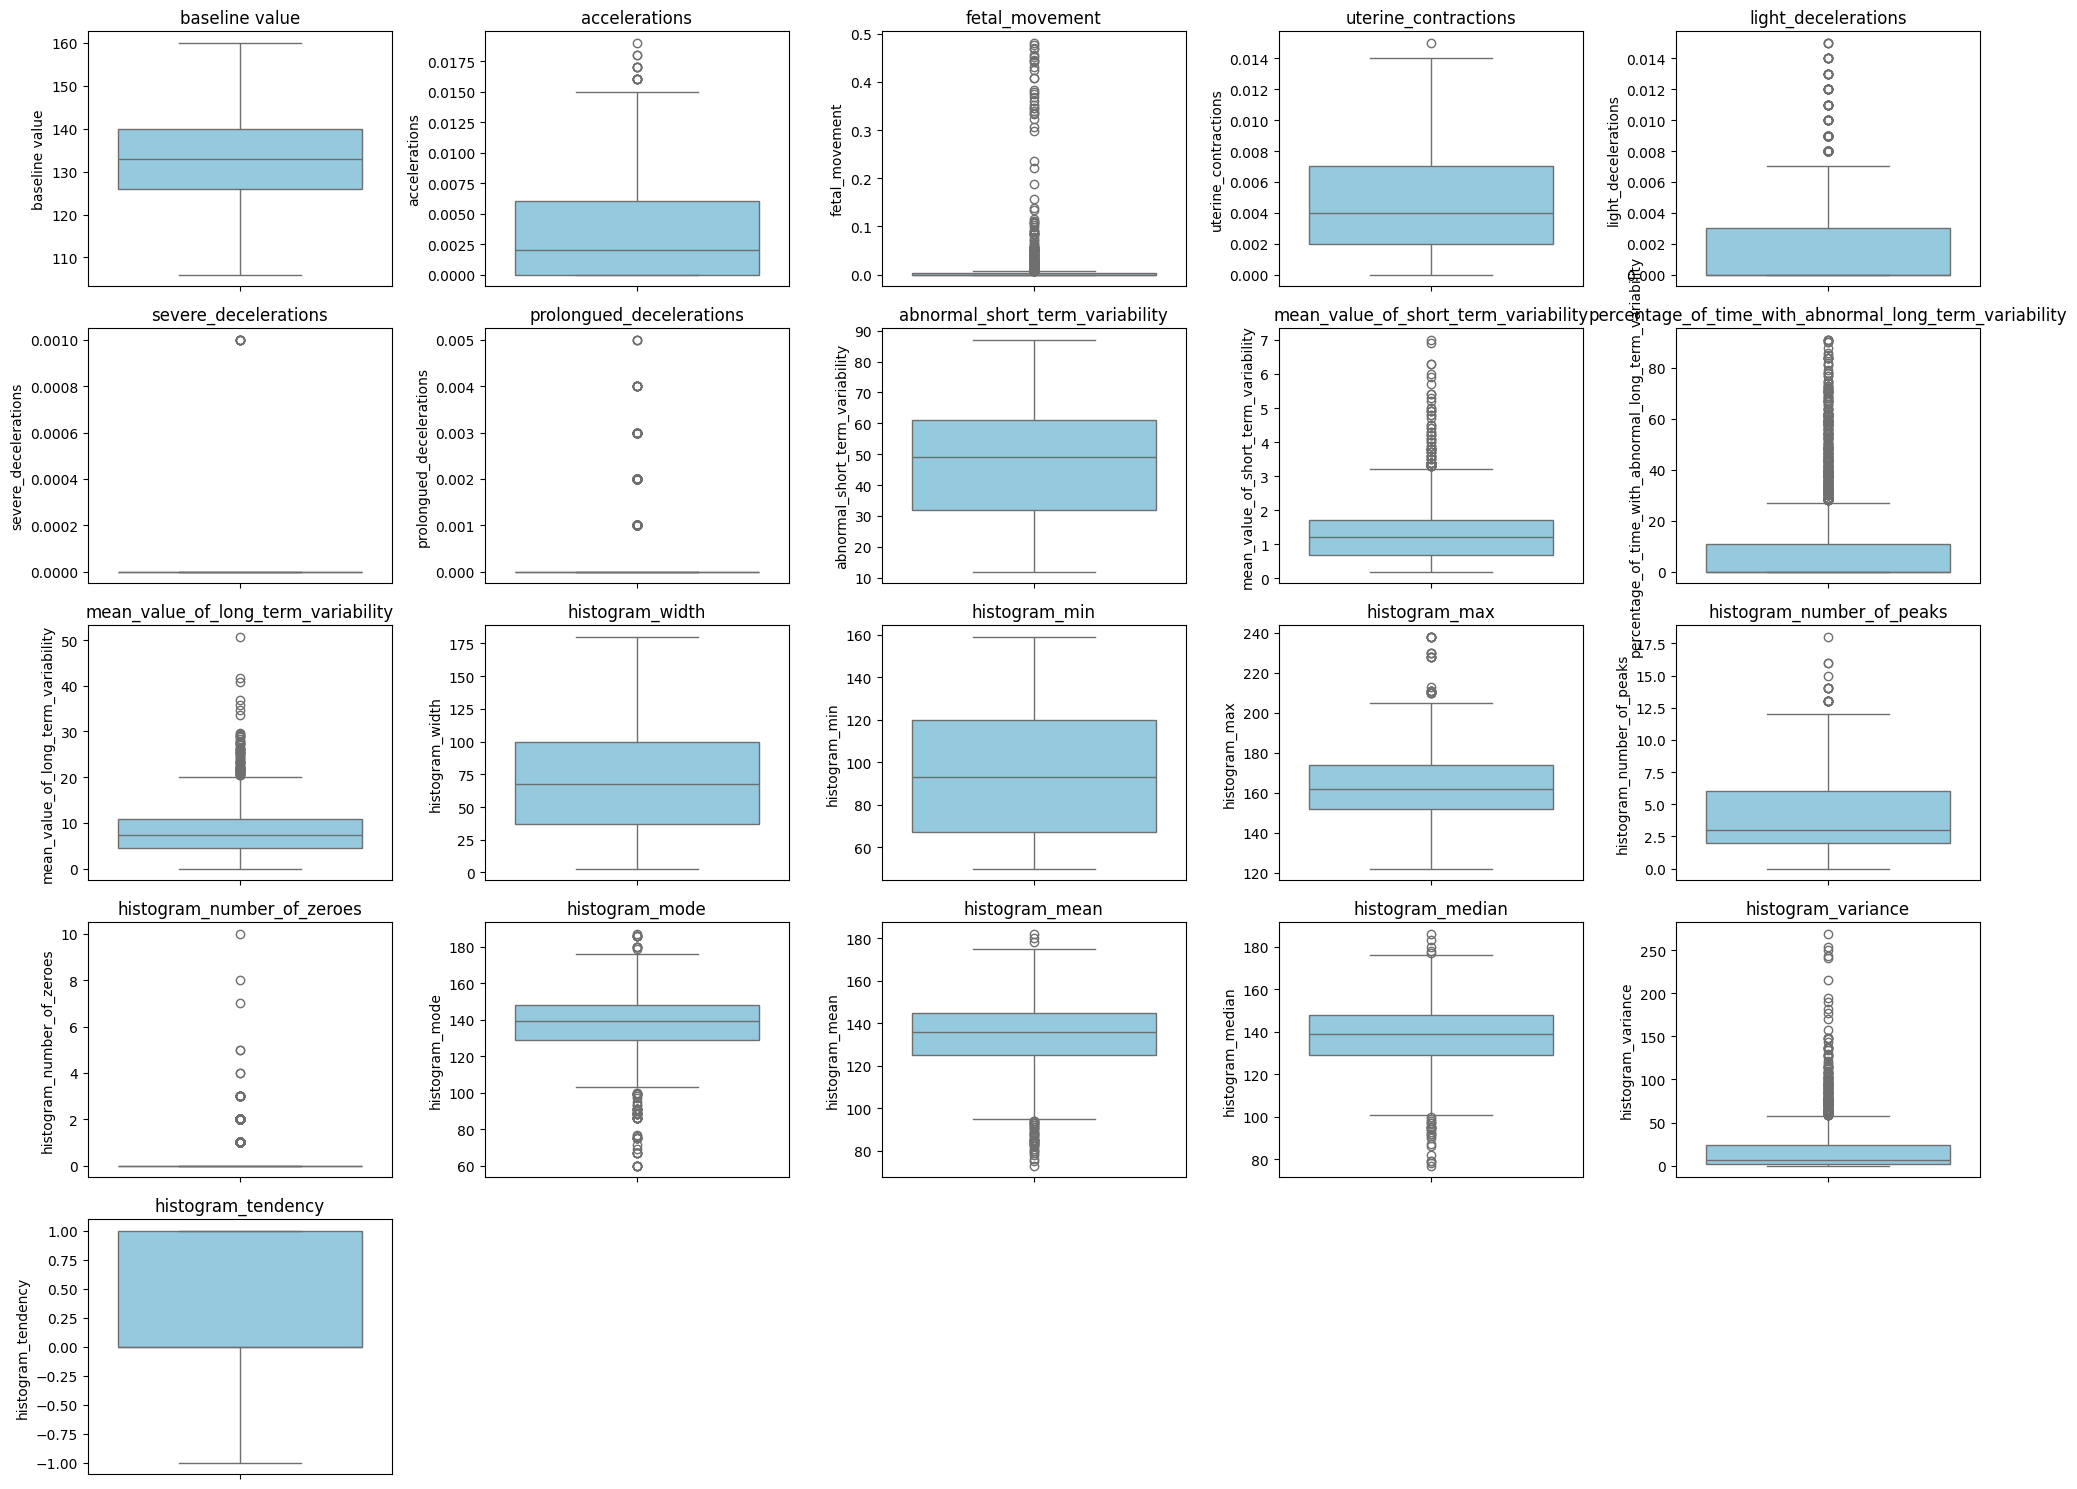

In [29]:
plt.figure(figsize=(20, 15))  
for index, column in enumerate(df.columns[:-1], 1): 
    plt.subplot(5, 5, index)
    sns.boxplot(df[column], color='skyblue')  
    plt.title(column) 
plt.tight_layout()  
plt.show()

In [37]:
missing_values = df.isnull().sum()
missing_values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [45]:
scaler = StandardScaler()
X = df.drop('fetal_health', axis=1) 
y = df['fetal_health'] 
X_scaled = scaler.fit_transform(X)  

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [47]:
len(X_scaled)

2126

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 
# print(y_pred)

In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[326   6   1]
 [ 13  50   1]
 [  1   1  27]]


In [63]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 


Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.78      0.83        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.94      0.95      0.94       426



In [69]:
roc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_score}")

ROC-AUC Score: 0.9855745685829805


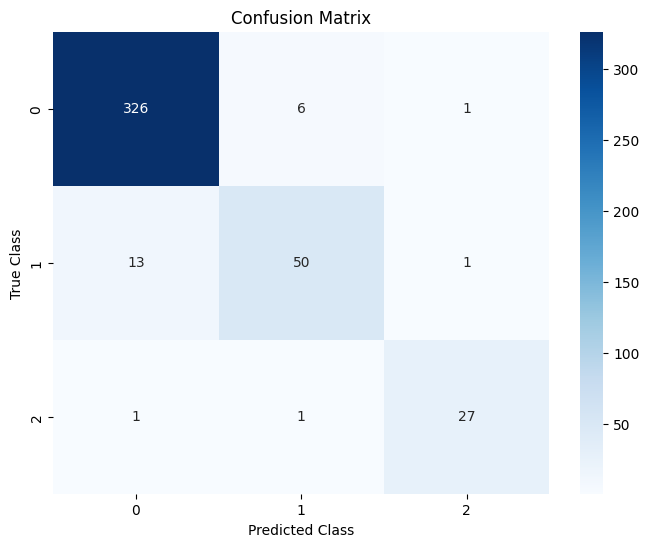

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()